### 실내 공기 오염도 머신러닝 분석
- 컬럼 : date, temp, humidity, dust, pollution, co2

- EDA 시각화
    - 상관관계 (temp / humidity / dust / co2 / pollution)
    - 상관관계 수치 데이터 + 데이터프레임 형식 이미지
    - 시간 흐름에 따른 분포도 (temp / humidity / dust / co2 / pollution)
    - Box plot을 활용하여 각 데이터의 범위 확인
    - PACF (부분자기상관함수) 분석 : 한 시점 이전의 관측치가 현재 시점의 관측치에 미치는 영향 파악
        - 시간의 효과를 제거한 상관계수 
        - pollution 컬럼 사용
    - Autocorrelation(자기상관함수) 분석 : 시계열의 자신과 시차를 둔 버전 사이의 상관 관계를 찾는 것
        - 온도(temp), 습도(humidity), 먼지(dust), 대기오염(pollution), 이산화탄소(co2)에 대한 각각의 자기상관 함수
    - Plotly 온라인 시각화
- 머신러닝 테스트
    - 회귀분석 (테스트)
        - 선형 회귀 / 라쏘 회귀 / 릿지 회귀 / 랜덤 포레스트 회귀
        - 목적 : R2 score(R-squared)를 활용하여 회귀 모델의 성능에 대한 평가지표 확인
        - 훈련된 모델의 feature_importances_ 속성을 사용하여 특성 중요도 시각화
    - 회귀분석 (검증)
        - 기존 모델 포함 + (K-Neighbors Regressor, XGBRegressor, CatBoosting Regressor)
        - 성능 분석 및 검증 지표 : RMSE, MAE, R2 Score 
        - 해당 지표를 데이터프레임에 표현


In [22]:
import pandas as pd

df = pd.read_csv("/home/kkyu/amr_ws/DL/IoT_Project/실내오염지수분석.csv")
df

,date,temp,humidity,dust,pollution,co2
0,2013-01-01,20,84,13,129,72.076
1,2013-01-02,21,92,9,148,64.442
2,2013-01-03,20,87,6,159,64.084
3,2013-01-04,20,71,4,181,60.842
4,2013-01-05,20,86,5,138,61.798
...,...,...,...,...,...,...
1455,2016-12-28,27,68,15,227,74.000
1456,2016-12-29,26,87,14,224,125.000
1457,2016-12-30,25,89,13,187,93.000
1458,2016-12-31,24,87,15,150,89.000


In [37]:
# 상관 관계 계산
correlation_matrix = df[['temp', 'humidity', 'dust', 'pollution', 'co2']].corr()

print(correlation_matrix)

               temp  humidity      dust  pollution       co2
temp       1.000000 -0.020842  0.016290   0.082858 -0.000378
humidity  -0.020842  1.000000 -0.078342   0.121851  0.130608
dust       0.016290 -0.078342  1.000000   0.002214  0.081225
pollution  0.082858  0.121851  0.002214   1.000000  0.173506
co2       -0.000378  0.130608  0.081225   0.173506  1.000000


<Axes: >

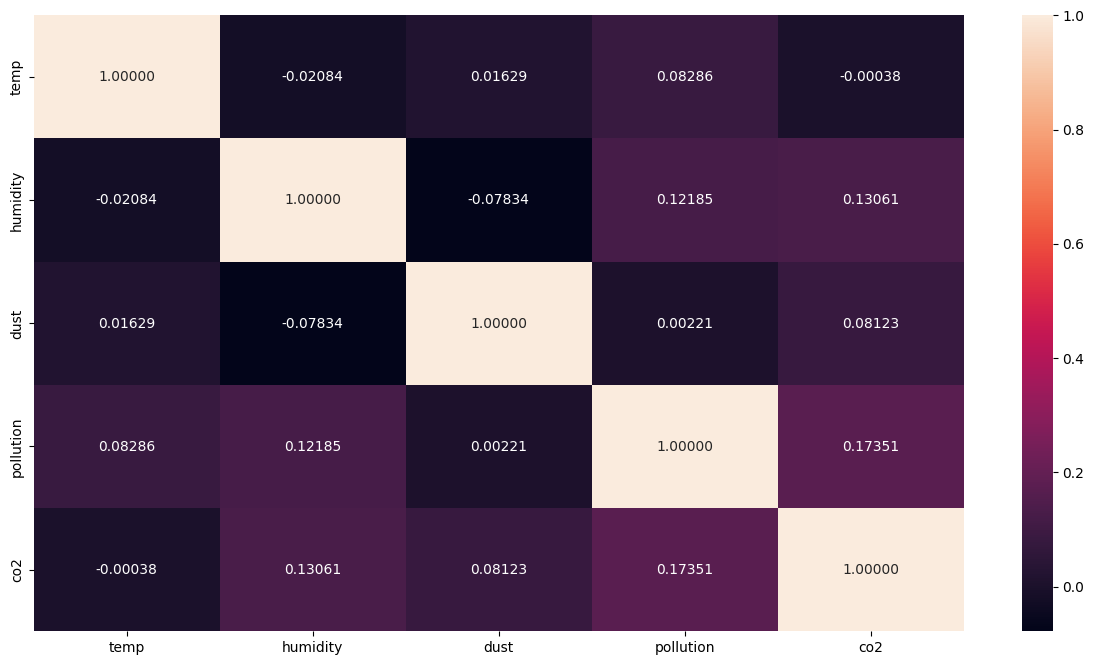

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))
sns.heatmap(df[['temp', 'humidity', 'dust', 'pollution', 'co2']].corr(),annot=True, fmt="1.5f")

### EDA

In [3]:
# 'Date' 열을 datetime 형식으로 변환
df['date'] = pd.to_datetime(df['date'])

# 'Date' 열을 인덱스로 설정
df.set_index('date', inplace=True)

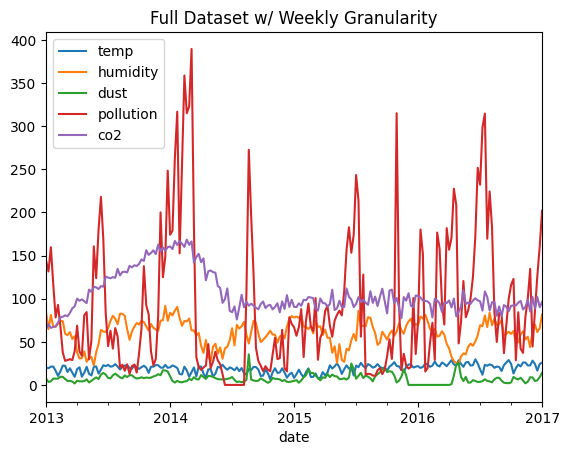

In [4]:
weekly = df.resample('W').mean()
weekly.plot(title = "Full Dataset w/ Weekly Granularity");

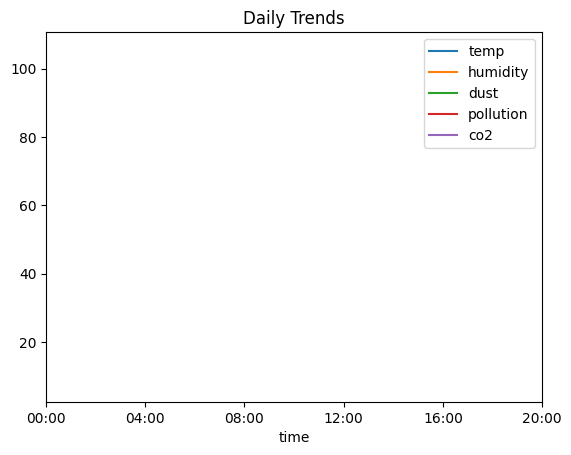

In [5]:
## 현재 시간 값이 존재하지 않아서 데이터가 없음

import numpy as np

by_time = df.groupby(df.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, title = 'Daily Trends');

In [6]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,temp,humidity,dust,pollution,co2
temp,1.000000,-0.020842,0.016290,0.082858,-0.000378
humidity,-0.020842,1.000000,-0.078342,0.121851,0.130608
dust,0.016290,-0.078342,1.000000,0.002214,0.081225
pollution,0.082858,0.121851,0.002214,1.000000,0.173506
co2,-0.000378,0.130608,0.081225,0.173506,1.000000


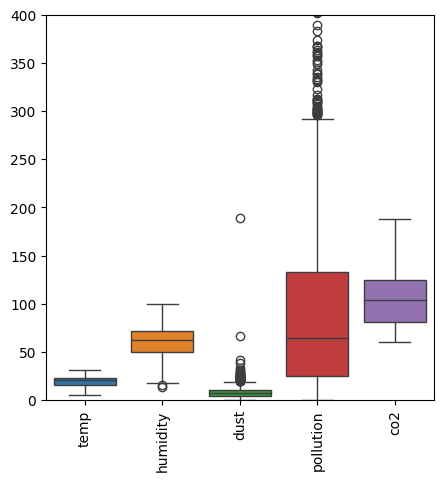

In [7]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df)
plt.ylim(0, 400)  # y 축 범위 조정
plt.xticks(rotation='vertical')
plt.show()


/tmp/ipykernel_25695/3278551279.py:30: UserWarning: Glyph 13217 (\N{SQUARE M SQUARED}) missing from current font.
  plt.tight_layout()
/home/kkyu/venv/deep_test/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 13217 (\N{SQUARE M SQUARED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


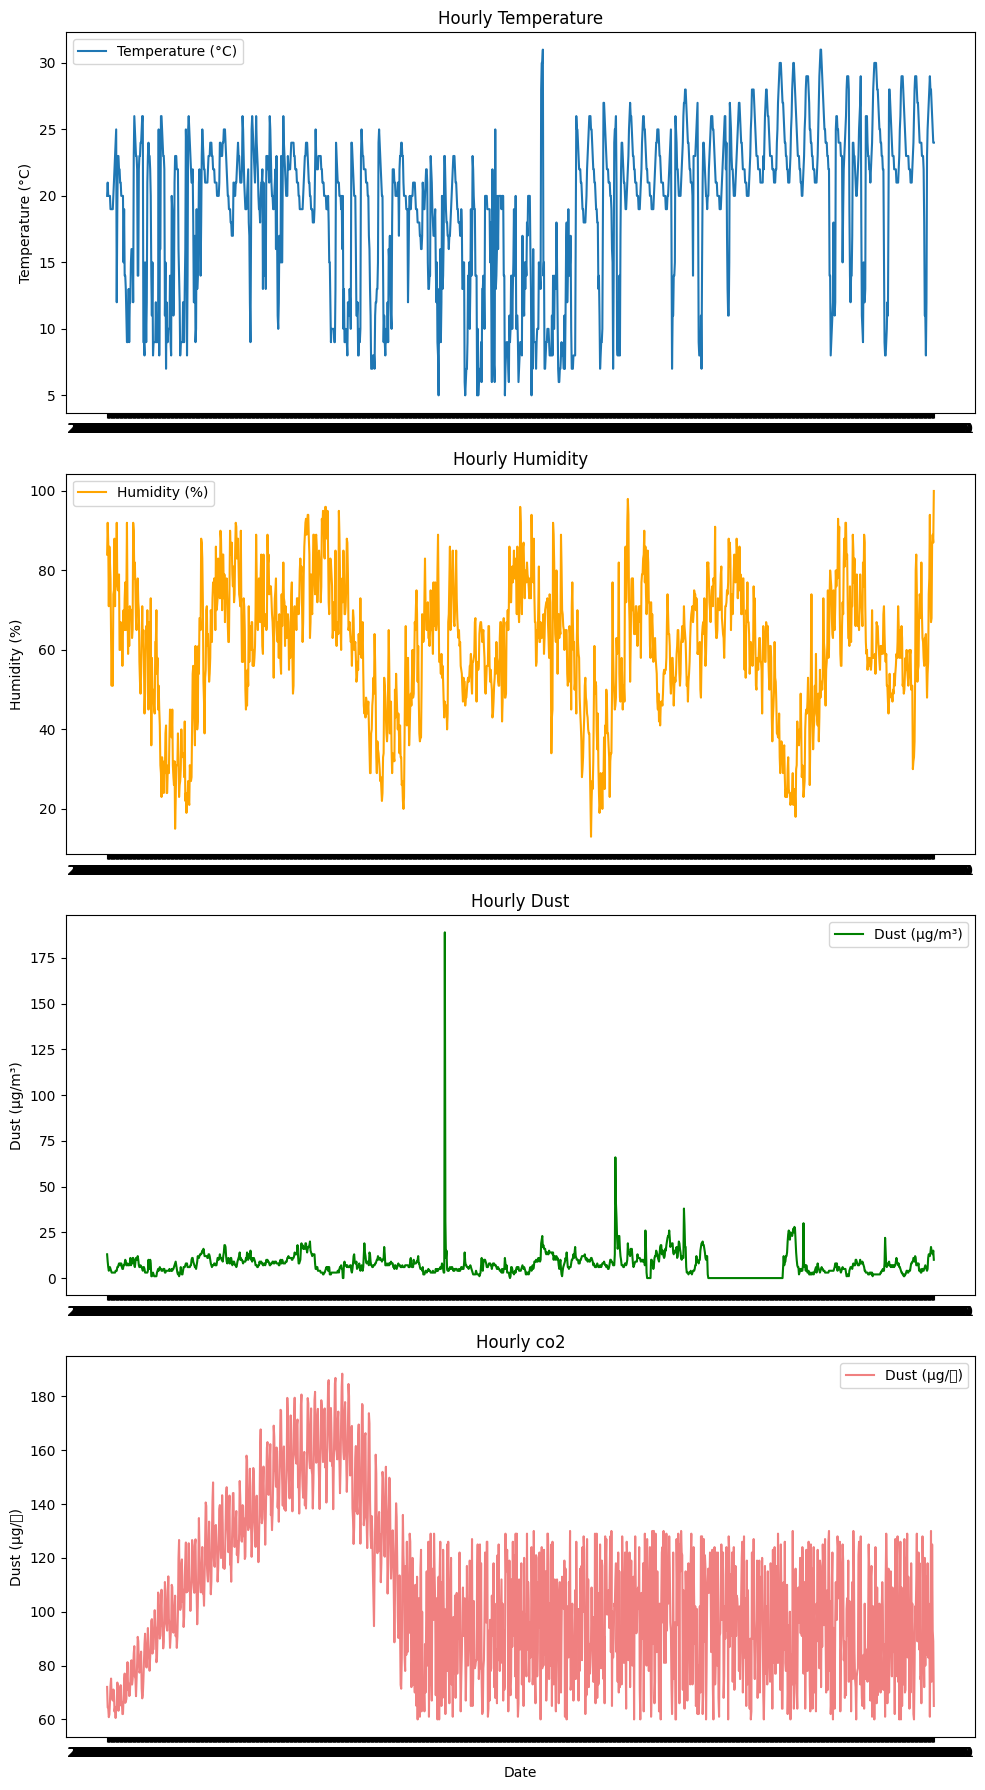

In [23]:
import matplotlib.pyplot as plt 

fig, axes = plt.subplots(4, 1, figsize=(10, 18))

# Plot temperature
axes[0].plot(df['date'], df['temp'], label='Temperature (°C)')
axes[0].set_title('Hourly Temperature')
axes[0].set_ylabel('Temperature (°C)')
axes[0].legend()

# Plot humidity
axes[1].plot(df['date'], df['humidity'], label='Humidity (%)', color='orange')
axes[1].set_title('Hourly Humidity')
axes[1].set_ylabel('Humidity (%)')
axes[1].legend()

# Plot dust
axes[2].plot(df['date'], df['dust'], label='Dust (μg/m³)', color='green')
axes[2].set_title('Hourly Dust')
axes[2].set_ylabel('Dust (μg/m³)')
axes[2].legend()

# Plot co2
axes[3].plot(df['date'], df['co2'], label='Dust (μg/㎡)', color='lightcoral')
axes[3].set_title('Hourly co2')
axes[3].set_ylabel('Dust (μg/㎡)')
axes[3].legend()

axes[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()

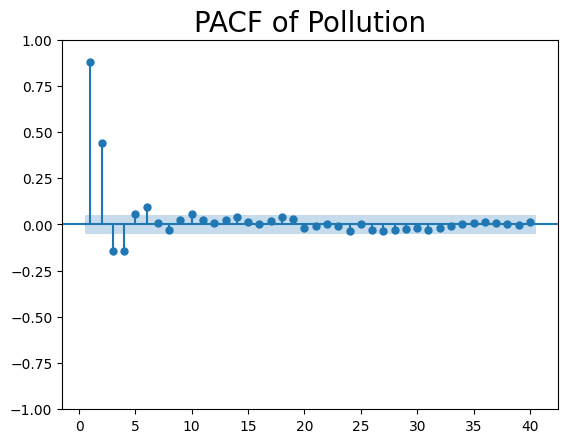

In [24]:
import statsmodels.graphics.tsaplots as sgt

sgt.plot_pacf(df.pollution[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Pollution", size = 20)
plt.show()

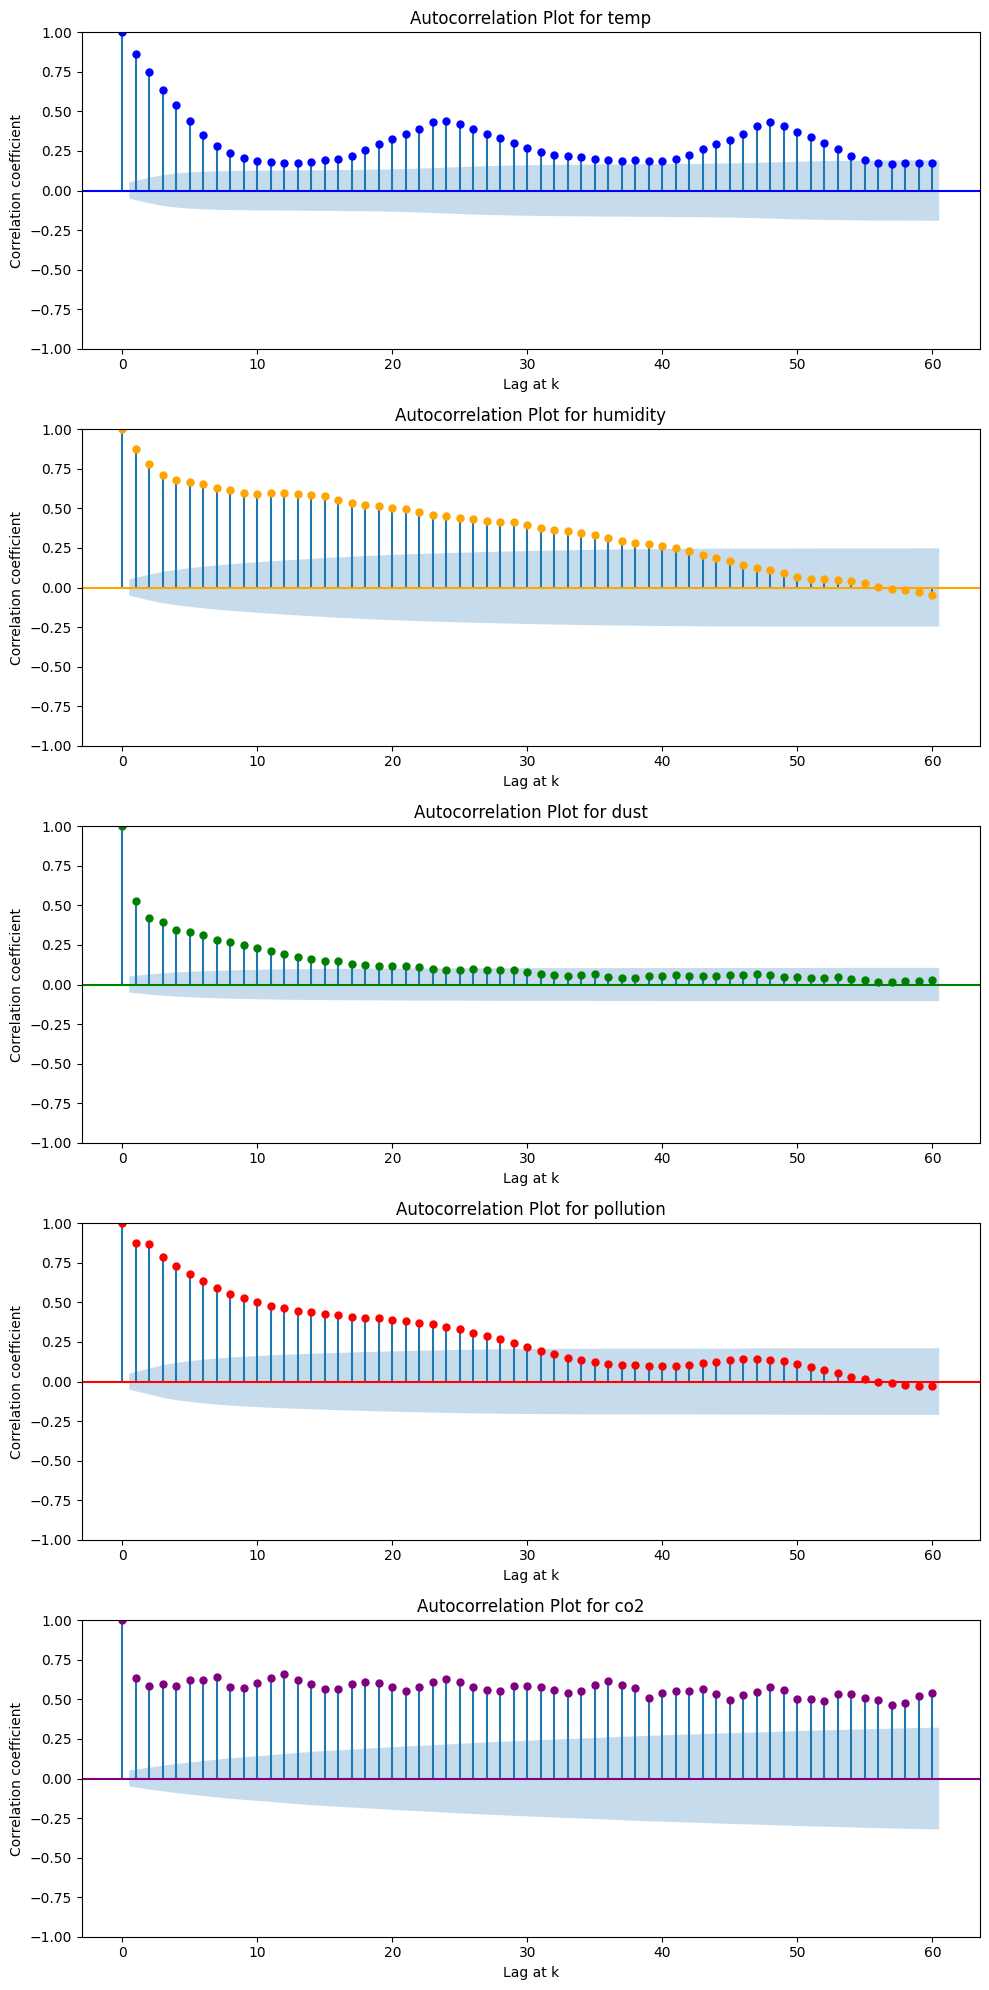

In [29]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

# 각 열의 자기상관 함수를 시각화합니다.
fig, axs = plt.subplots(5, 1, figsize=(10, 20))

colors = ['blue', 'orange', 'green', 'red', 'purple']

for i, col in enumerate(["temp", "humidity", "dust", "pollution", "co2"]):
    tsaplots.plot_acf(df[col], lags=60, ax=axs[i], color=colors[i])
    axs[i].set_title(f'Autocorrelation Plot for {col}')
    axs[i].set_xlabel("Lag at k")
    axs[i].set_ylabel("Correlation coefficient")

plt.tight_layout()
plt.show()


In [31]:
import plotly.graph_objs as go

# 선 그래프 생성
trace_temp = go.Scatter(x=df.index, y=df['temp'], mode='lines', name='Temperature')
trace_humidity = go.Scatter(x=df.index, y=df['humidity'], mode='lines', name='Humidity')
trace_dust = go.Scatter(x=df.index, y=df['dust'], mode='lines', name='Dust')
trace_pollution = go.Scatter(x=df.index, y=df['pollution'], mode='lines', name='Pollution')
trace_co2 = go.Scatter(x=df.index, y=df['co2'], mode='lines', name='CO2')

# 레이아웃 정의
layout = go.Layout(title='Time Series Plot', xaxis=dict(title='Date'), yaxis=dict(title='Value'))

# 그래프 객체 생성
fig = go.Figure(data=[trace_temp, trace_humidity, trace_dust, trace_pollution, trace_co2], layout=layout)

# 그래프 표시
fig.show()


### 회귀 분석을 위한 랜덤 포레스트 모델
- 모델을 훈련한 후, 훈련된 랜덤 포레스트 모델의 feature_importances_ 속성을 사용하여 특성 중요도를 추출

In [9]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


In [11]:
X = df.drop('pollution', axis=1)
y = df['pollution']

In [14]:
def solve(X,y):

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=1)
    # using linear regression
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("R2_score of Linear Regression:",r2_score(y_test,y_pred))

    model = Lasso(alpha=0.1)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("R2_score of Lasso Regression:",r2_score(y_test,y_pred))

    model = Ridge(alpha=0.1)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("R2_score of Ridge Regression:",r2_score(y_test,y_pred))

    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R2_score of Random Forest Regression:",r2_score(y_test,y_pred))


In [15]:
solve(X,y)


R2_score of Linear Regression: 0.025584113356737603
R2_score of Lasso Regression: 0.025606328652077015
R2_score of Ridge Regression: 0.025584129269019207
R2_score of Random Forest Regression: 0.21785374111129974


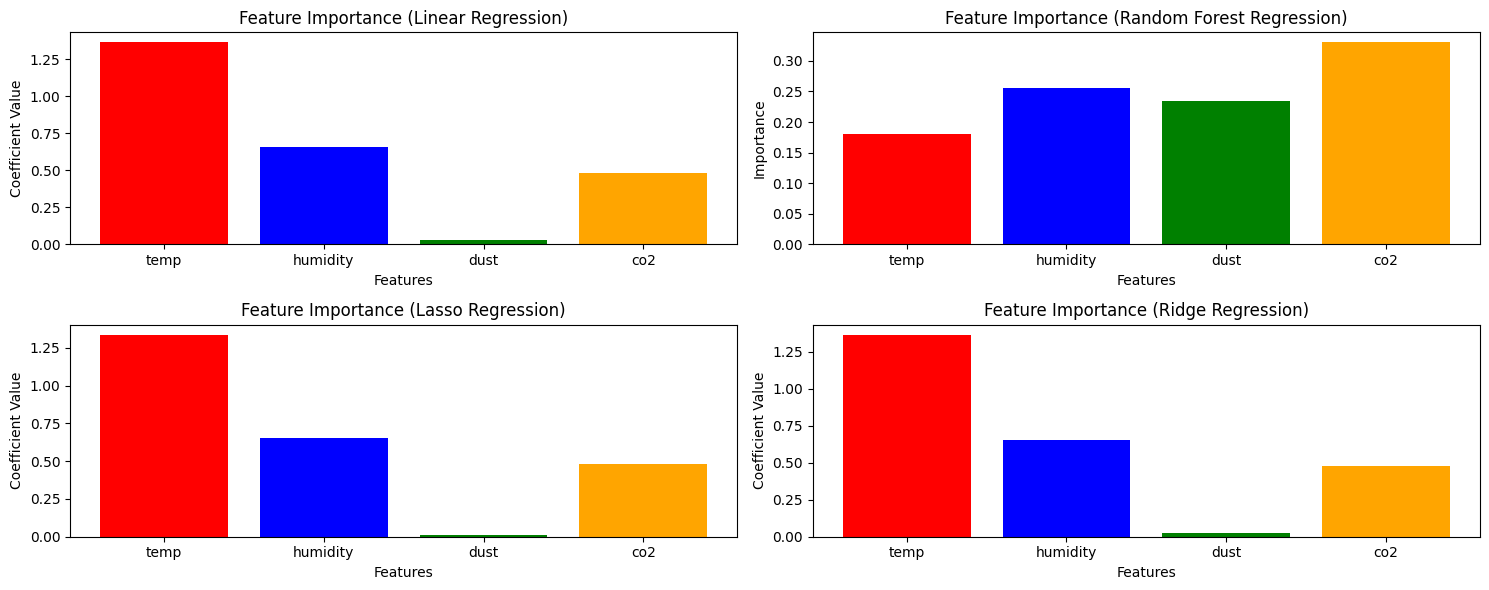

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=1)

# 랜덤포레스트 회귀 모델
random_model = RandomForestRegressor()
random_model.fit(X_train, y_train)
y_pred_random = random_model.predict(X_test)

# 선형 회귀 모델
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Lasso 회귀 모델
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Ridge 회귀 모델
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)


color = ['red','blue','green', 'orange']
fig, axes = plt.subplots(2, 2, figsize=(15, 6))

# 선형 회귀 모델의 특성 중요도 그래프
axes[0, 0].bar(np.arange(len(linear_model.coef_)), linear_model.coef_, color=color)
axes[0, 0].set_xticks(np.arange(len(linear_model.coef_)))
axes[0, 0].set_xticklabels(X.columns)
axes[0, 0].set_xlabel('Features')
axes[0, 0].set_ylabel('Coefficient Value')
axes[0, 0].set_title('Feature Importance (Linear Regression)')

# 랜덤 포레스트 회귀 모델의 특성 중요도 그래프
axes[0, 1].bar(np.arange(len(random_model.feature_importances_)), random_model.feature_importances_, color=color)
axes[0, 1].set_xticks(np.arange(len(random_model.feature_importances_)))
axes[0, 1].set_xticklabels(X.columns)
axes[0, 1].set_xlabel('Features')
axes[0, 1].set_ylabel('Importance')
axes[0, 1].set_title('Feature Importance (Random Forest Regression)')

# Lasso 회귀 모델의 특성 중요도 그래프
axes[1, 0].bar(np.arange(len(lasso_model.coef_)), lasso_model.coef_, color=color)
axes[1, 0].set_xticks(np.arange(len(lasso_model.coef_)))
axes[1, 0].set_xticklabels(X.columns)
axes[1, 0].set_xlabel('Features')
axes[1, 0].set_ylabel('Coefficient Value')
axes[1, 0].set_title('Feature Importance (Lasso Regression)')

# Ridge 회귀 모델의 특성 중요도 그래프
axes[1, 1].bar(np.arange(len(ridge_model.coef_)), ridge_model.coef_, color=color)
axes[1, 1].set_xticks(np.arange(len(ridge_model.coef_)))
axes[1, 1].set_xticklabels(X.columns)
axes[1, 1].set_xlabel('Features')
axes[1, 1].set_ylabel('Coefficient Value')
axes[1, 1].set_title('Feature Importance (Ridge Regression)')


plt.tight_layout()
plt.show()


### Model Training

In [17]:
# Import libraries to rain the model and test it
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [18]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 86.3790
- Mean Absolute Error: 66.7287
- R2 Score: 0.0535
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 86.0008
- Mean Absolute Error: 66.2232
- R2 Score: 0.0256


Lasso
Model performance for Training set
- Root Mean Squared Error: 86.3793
- Mean Absolute Error: 66.7314
- R2 Score: 0.0535
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 85.9912
- Mean Absolute Error: 66.2301
- R2 Score: 0.0258


Ridge
Model performance for Training set
- Root Mean Squared Error: 86.3790
- Mean Absolute Error: 66.7287
- R2 Score: 0.0535
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 86.0008
- Mean Absolute Error: 66.2232
- R2 Score: 0.0256


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 71.3102
- Mean Absolute Error: 51.2411
- R2 Score: 0.3549
---------

In [20]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,CatBoosting Regressor,0.270460
4,Random Forest Regressor,0.215173
5,XGBRegressor,0.161279
3,K-Neighbors Regressor,0.047344
1,Lasso,0.025802
2,Ridge,0.025584
0,Linear Regression,0.025584
